In [1]:
from golf import PiecewiseModel, fit
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt


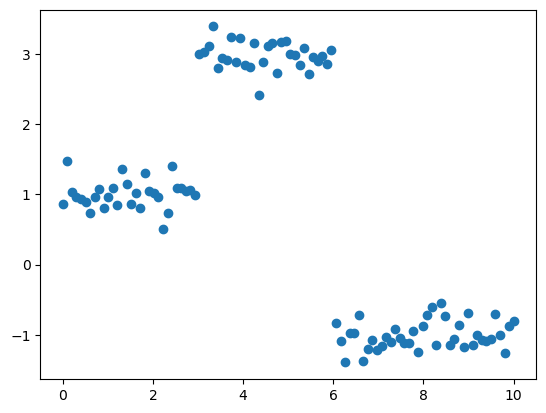

In [2]:
key = jax.random.PRNGKey(420)
x_data = jnp.linspace(0, 10, 100)
y_data = jnp.where(x_data < 3, 1.0, jnp.where(x_data < 6, 3.0, -1.0))
y_data += jax.random.normal(key, (100,)) * 0.2


In [11]:
initial_model = PiecewiseModel(n_segments=5, x_range=(0, 10), init_random=False , key=key)

print("Initial internal breakpoints (x-coordinates):", initial_model.internal_breakpoints_x)
print("Initial breakpoint heights (y-coordinates):", initial_model.breakpoints_y)

# 3. Train the model using the fit function
trained_model = fit(
    initial_model,
    x_data,
    y_data,
    n_iterations=2000,
    learning_rate=0.01,
    patience=200,
)
print("Final internal breakpoints (x-coordinates):", trained_model.internal_breakpoints_x)
print("Final breakpoint heigths (y-coordinates):", trained_model.breakpoints_y)
print("Final model coefficients", )

Initial internal breakpoints (x-coordinates): [2. 4. 6. 8.]
Initial breakpoint heights (y-coordinates): [-1.4182527   0.12200668  0.8509691   0.62384695 -1.2904185   0.9246086 ]
--- Starting Training ---
Iteration     1: Loss = 2.627233
Iteration   200: Loss = 0.296446
Iteration   400: Loss = 0.139627
Iteration   600: Loss = 0.069932
Iteration   800: Loss = 0.038268
Iteration  1000: Loss = 0.037989
Iteration  1200: Loss = 0.037978
Iteration  1400: Loss = 0.037978
Iteration  1600: Loss = 0.037978
Iteration  1800: Loss = 0.037978
Early stopping at iteration 1805
--- Finished Training ---
Final internal breakpoints (x-coordinates): [3.011586  3.0145268 5.9977736 5.968187 ]
Final breakpoint heigths (y-coordinates): [ 0.99326056  1.0139025   3.0346932   2.9212325  -1.0783254  -0.9255869 ]


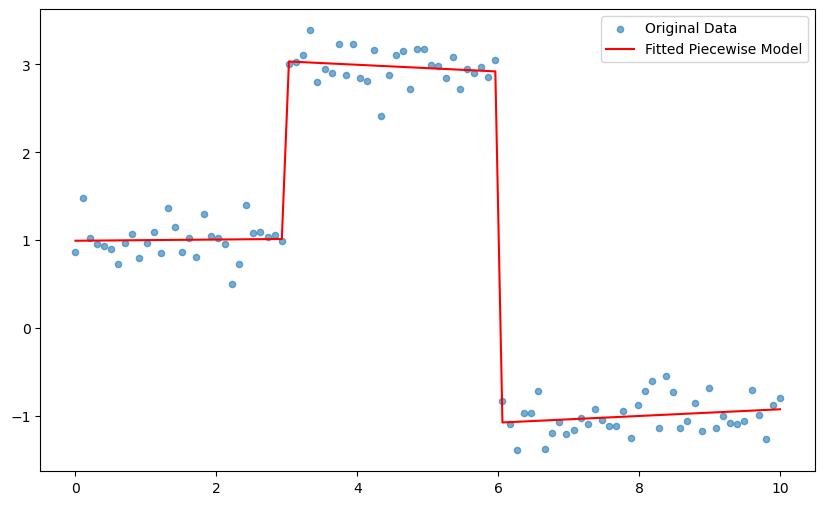

In [10]:
y_pred_final = jax.vmap(trained_model)(x_data)

plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Original Data', alpha=0.6, s=20, zorder=1)
plt.plot(x_data, y_pred_final, color='red', label='Fitted Piecewise Model', zorder=2)
plt.legend()


